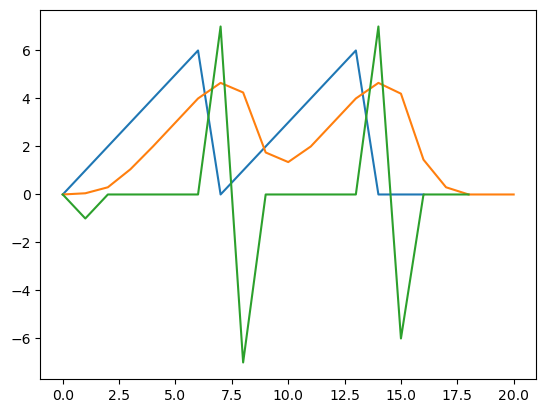

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = [0,1, 2, 3, 4, 5,6, 0, 1,2, 3, 4, 5, 6, 0, 0, 0]
H_L = [0.05, 0.2, 0.5, 0.2, 0.05]
H_H = [-1, 2, -1]

y_low = np.convolve(X, H_L)
y_high = np.convolve(X, H_H)
plt.plot(X)
plt.plot(y_low)
plt.plot(y_high)

In [ ]:
from scipy import signal 
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np 

im = imread(r"C://Users//Admin//Downloads//Neural.JPG")
img = rgb2gray(im)*255

plt.imshow(img, cmap='gray')

img1 = img[40:350, 20:350]
plt.imshow(img1, cmap='gray')
plt.show()
fil1 = np.array([[ 0, -1, 0], 
                 [-1, 4, -1],
                 [ 0, -1, 0]])
fil2 = np.array([[0.2, 0.5, 0.2],
                 [0.5, 1, 0.5], 
                 [0.2, 0.5, 0.2]])
fil3 = np.array([[0.1, 0.1, 0.1, 0.1, 0.1], 
                 [0.1, 0.1, 0.1, 0.1, 0.1],
                 [0.1, 0.1, 0.1, 0.1, 0.1],
                 [0.1, 0.1, 0.1, 0.1, 0.1],
                 [0.1, 0.1, 0.1, 0.1, 0.1]])
grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')

plt.imshow(abs(grad1),cmap='gray',vmin=np.min(grad),vmax = np.max(grad))
plt.show()
plt.imshow(grad2,cmap='gray')
plt.show()
plt.imshow(grad3,cmap='gray')
           
                 

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0559 - loss: -930075.3125 - val_accuracy: 0.0542 - val_loss: -21957684.0000
Epoch 2/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0558 - loss: -57877480.0000 - val_accuracy: 0.0542 - val_loss: -256538800.0000
Epoch 3/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0549 - loss: -400944768.0000 - val_accuracy: 0.0542 - val_loss: -967509056.0000
Epoch 4/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0533 - loss: -1300643584.0000 - val_accuracy: 0.0542 - val_loss: -2418982144.0000
Epoch 5/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0558 - loss: -3022820096.0000 - val_accuracy: 0.0542 - val_loss: -4885274624.0000
Epoch 6/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0536 - loss: -5805943808.0000 - val_accuracy: 0.0542 - val_loss: -8666401792.0000
Epoch 7/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0545 - loss: -10157165568.0000 - val_accura

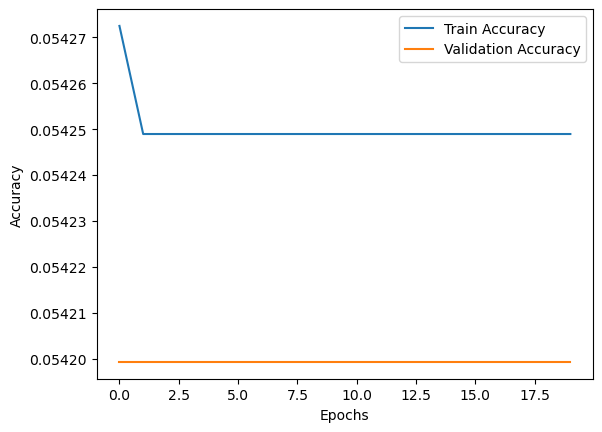

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ===========================
# STEP 1: Load the Dataset
# ===========================
# Assuming your dataset is a CSV file with continuous columns + target column
df = pd.read_csv("C://Users//Admin//Downloads//Combined Data.csv//Combined Data.csv")

non_numeric_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in non_numeric_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Extract features and labels
feature_columns = df.columns[:-1]
target_column = df.columns[-1]

X = df[feature_columns].values  # Features
y = df[target_column].values    # Labels

# Normalize numerical data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into train & validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# ===========================
# STEP 3: Build the Fully Connected Neural Network
# ===========================
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# ===========================
# STEP 4: Train the Model
# ===========================
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# ===========================
# STEP 5: Evaluate the Model
# ===========================
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")

# ===========================
# STEP 6: Plot Training History
# ===========================
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [9]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0546 - loss: -459107270656.0000 - val_accuracy: 0.0542 - val_loss: -507834990592.0000
Epoch 2/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0547 - loss: -543325945856.0000 - val_accuracy: 0.0542 - val_loss: -595294027776.0000
Epoch 3/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0527 - loss: -632058478592.0000 - val_accuracy: 0.0542 - val_loss: -693159788544.0000
Epoch 4/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0555 - loss: -737380270080.0000 - val_accuracy: 0.0542 - val_loss: -802342240256.0000
Epoch 5/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0553 - loss: -850202984448.0000 - val_accuracy: 0.0542 - val_loss: -923865645056.0000
Epoch 6/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0562 - loss: -978218319872.0000 - val_accuracy: 0.0542 - val_loss: -1057894498304.0000
Epoch 7/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0535 - 

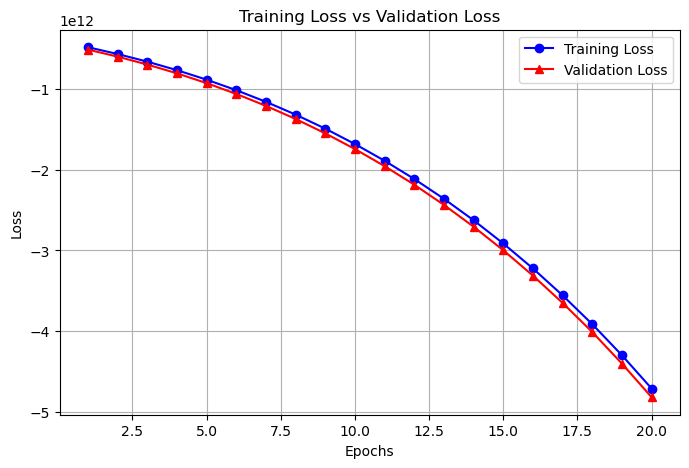

In [11]:
import matplotlib.pyplot as plt

# Extract loss values from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot Training Loss vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'bo-', label="Training Loss")   # 'bo-' means blue circle markers with a line
plt.plot(epochs, val_loss, 'r^-', label="Validation Loss")  # 'r^-' means red triangle markers with a line
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
from sklearn.model_selection import train_test_split

# First, split into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Now, split training data into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)


In [15]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0536 - loss: -5051693137920.0000 - val_accuracy: 0.0542 - val_loss: -5265754685440.0000
Epoch 2/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0544 - loss: -5496093802496.0000 - val_accuracy: 0.0542 - val_loss: -5740463915008.0000
Epoch 3/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0552 - loss: -5969611849728.0000 - val_accuracy: 0.0542 - val_loss: -6246624657408.0000
Epoch 4/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0549 - loss: -6475111464960.0000 - val_accuracy: 0.0542 - val_loss: -6783501860864.0000
Epoch 5/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0536 - loss: -7142878740480.0000 - val_accuracy: 0.0542 - val_loss: -7352516870144.0000
Epoch 6/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0566 - loss: -7586904539136.0000 - val_accuracy: 0.0542 - val_loss: -7961144983552.0000
Epoch 7/20
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy

In [31]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0556 - loss: -20561279320064.0000
Test Loss: -20921144311808.0000
Test Accuracy: 0.0542


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Print classification report
print(classification_report(y_test, y_pred_classes))


332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.07      1.00      0.14       778
           1       0.00      0.00      0.00       575
           2       0.00      0.00      0.00      3081
           3       0.00      0.00      0.00      3270
           4       0.00      0.00      0.00       240
           5       0.00      0.00      0.00       534
           6       0.00      0.00      0.00      2131

    accuracy                           0.07     10609
   macro avg       0.01      0.14      0.02     10609
weighted avg       0.01      0.07      0.01     10609



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


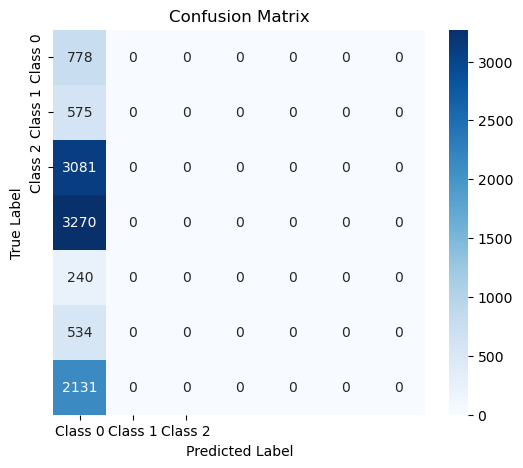

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Define class names
class_names = ["Class 0", "Class 1", "Class 2"]  # Modify based on your dataset

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
